## Homework 3 Assignment 2:  Read CSV files with pandas and ise NYC open data portal 

In [1]:
#Checking that an environmental variable PUIDATA exists and that it points to the PUIdata directory
import os
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME") 
    puidata =os.getenv("PUIDATA")
print(os.getenv("PUIDATA"))   
#puidata 

/nfshome/xh1163/PUIdata


In [2]:
#Download the Traffic Volume Counts CSV file. and move it to PUIdata
!curl https://data.cityofnewyork.us/api/views/p424-amsu/rows.csv?accessType=DOWNLOAD > trafcon.csv
!mv trafcon.csv $PUIDATA
!ls $PUIDATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  907k    0  907k    0     0   807k      0 --:--:--  0:00:01 --:--:--  806k
dhsdaily.csv  trafcon.csv


In [3]:
#read in the data with pandas
import pandas as pd 
trfc = pd.read_csv("%s/trafcon.csv"% os.getenv("PUIDATA"))

In [4]:
#print the fist 7 rows 
trfc.head(7)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106,74,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109,74,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36,28,11.0,...,426,425,419,469,425,358,224,185,132,74
3,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/05/2013,42,28,16.0,...,393,479,441,476,446,424,305,219,171,76
4,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/06/2013,35,38,12.0,...,383,384,391,369,401,338,236,186,123,76
5,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/07/2013,33,26,14.0,...,151,409,422,364,356,339,275,225,169,104
6,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/08/2013,35,28,18.0,...,430,518,461,485,531,393,351,276,242,154


In [5]:
# Remove all but 2 numerical values columns of 2:00-3:00AM and 2:00-3:00PM, 
#display the reducted dataframe of the first 7 rows
trfc_2 = trfc[['2:00-3:00AM', '2:00-3:00PM']]
trfc_2.head(7)

,2:00-3:00AM,2:00-3:00PM
0,45.0,371
1,55.0,308
2,11.0,426
3,16.0,393
4,12.0,383
5,14.0,151
6,18.0,430


Populating the interactive namespace from numpy and matplotlib


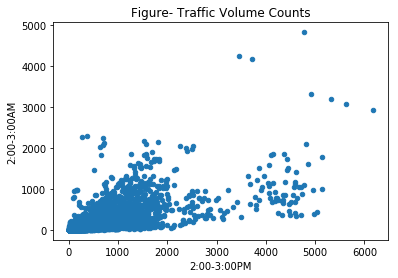

In [6]:
# plot the columns one against the other in a scatter plot
%pylab inline
trfc_2.plot(x='2:00-3:00PM', y='2:00-3:00AM', kind='scatter', title= "Figure- Traffic Volume Counts",legend="Ture") 


## Figure - Traffic Volume Counts: 

This figure represents the traffic Volume Counts of 2:00-3:00AM against the Traffic Volume Counts of 2:00-3:00PM. We can see that 2-3 PM has slightly more traffic counts than the 2-3 AM. Also, when there is more volume counts during AM, there also tend to be more counts during PM.

## Extra Credit Assignment : work with and APIs and dates in Pandas

In [7]:
url = "https://data.cityofnewyork.us/resource/ry4b-kref.json"

In [8]:
# read in the json file form url
df = pd.read_json(url)

In [9]:
# print the first 7 roes out
df.head(7)

,_10_00_11_00am,_10_00_11_00pm,_11_00_12_00am,_11_00_12_00pm,_12_00_1_00_am,_12_00_1_00pm,_1_00_2_00am,_1_00_2_00pm,_2_00_3_00am,_2_00_3_00pm,...,_8_00_9_00pm,_9_00_10_00am,_9_00_10_00pm,date,direction,from,id,roadway_name,segment_id,to
0,387,187,169,335,106,406,74,411,45,371,...,249,278,197,2013-02-02,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
1,249,125,79,351,109,374,74,350,55,308,...,210,204,144,2013-02-03,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
2,282,132,74,307,36,304,28,328,11,426,...,224,263,185,2013-02-04,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
3,255,171,76,294,42,310,28,382,16,393,...,305,241,219,2013-02-05,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
4,260,123,76,283,35,334,38,324,12,383,...,236,297,186,2013-02-06,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
5,215,169,104,263,33,254,26,303,14,151,...,275,273,225,2013-02-07,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
6,236,242,154,282,35,343,28,353,18,430,...,351,290,276,2013-02-08,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE


In [10]:
#select a date and 2 variables and change names to be consistant with the cvs file figure above.
tfc_3 = df[['date', '_2_00_3_00am','_2_00_3_00pm']]
tfc_3.rename(columns = {'date':'Date', 
               '_2_00_3_00am':'2:00-3:00AM', 
               '_2_00_3_00pm': '2:00-3:00PM'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Populating the interactive namespace from numpy and matplotlib


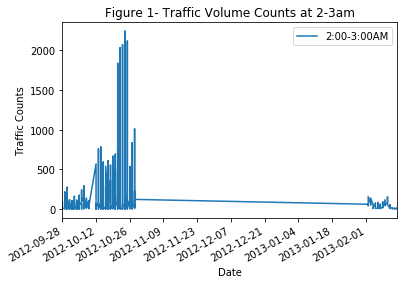

In [11]:
#PLOT the 2-3am coloumns against Dates
%pylab inline
ax = tfc_3.plot(x='Date', y='2:00-3:00AM',title= "Figure 1- Traffic Volume Counts at 2-3am");
ax.set_ylabel("Traffic Counts");


## Figure 1- Traffic Volume Counts at 2-3 AM
This figure represents the traffic Volume Counts of 2:00-3:00AM against the Date. We can see the peak traffic counts for 2-3AM happened around 2012 Octorber, and from 2012 November to 2013 February the traffic counts stayed low with not too much changes.

Populating the interactive namespace from numpy and matplotlib


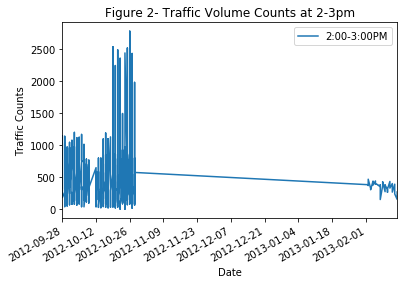

In [12]:
##PLOT the 2-3pm coloumns against Dates
%pylab inline
ax = tfc_3.plot(x='Date', y='2:00-3:00PM',title= "Figure 2- Traffic Volume Counts at 2-3pm");
ax.set_ylabel("Traffic Counts");

## Figure 2- Traffic Volume Counts at 2-3 PM
This figure represents the traffic Volume Counts of 2:00-3:00PM against the Date. We can see that similar to the figure for 2-3AM, the peak traffic counts for 2-3PM happened around 2012 Octorber and from 2012 November to 2013 February the traffic counts stayed relatively low with not too much changes. 